In [132]:
## CSCI 4150U - Data Mining - Lab 8
# Name: Thinh Le
# Student ID: 100741899
# Dataset: compound.txt

In [133]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
headers = ['x', 'y', 'Class']
data = pd.read_csv('./data/compound.txt', header=None, index_col=None, names=headers, sep='\t')
data.drop(columns=['Class'], inplace=True)
data

,x,y
0,26.75,22.15
1,29.80,22.15
2,31.55,21.10
3,27.70,20.85
4,29.90,19.95
...,...,...
394,15.85,9.95
395,15.35,9.90
396,15.60,9.45
397,15.30,9.15


In [135]:
# Part I:

Text(0.5, 1.0, 'K-means Clustering (K=6)')

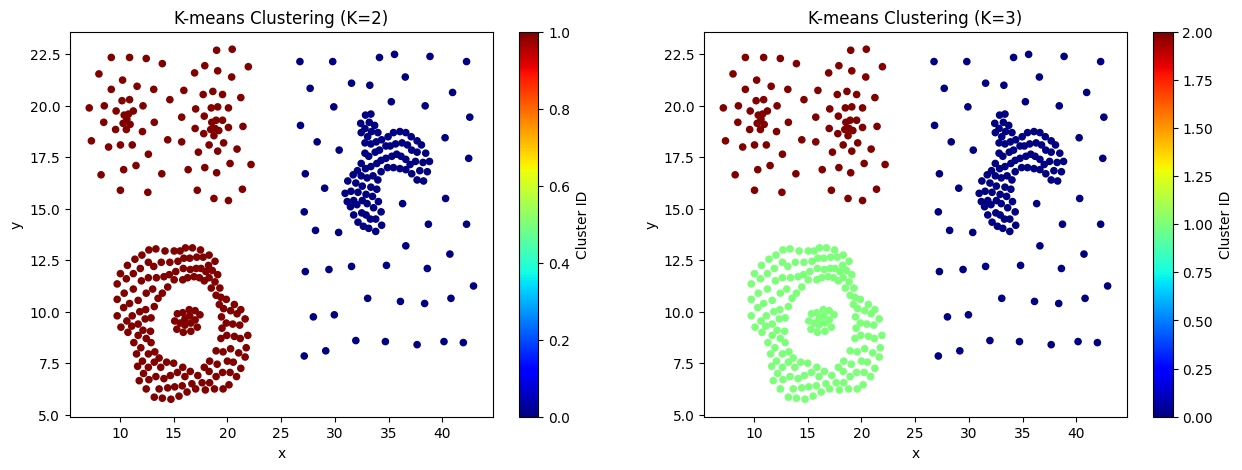

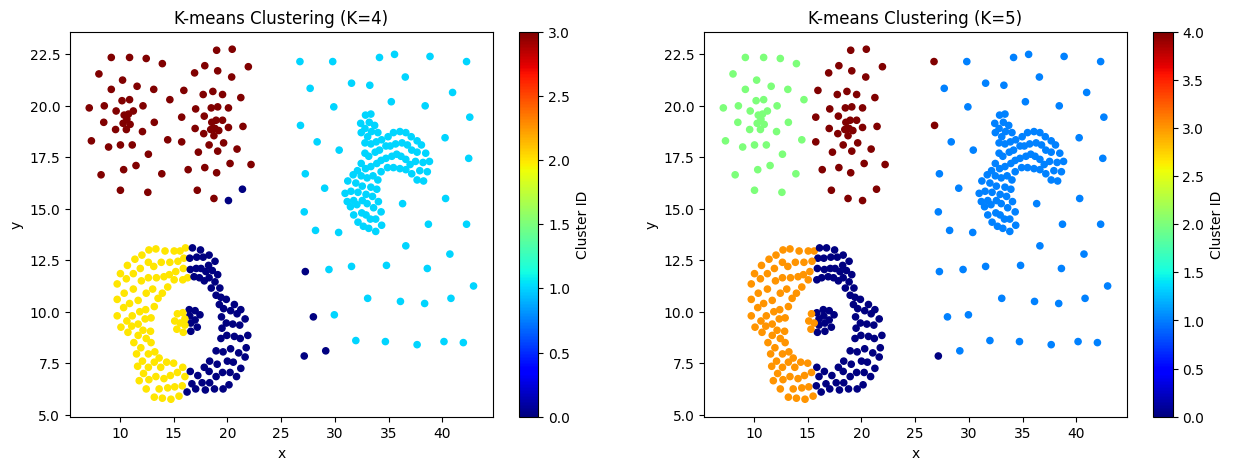

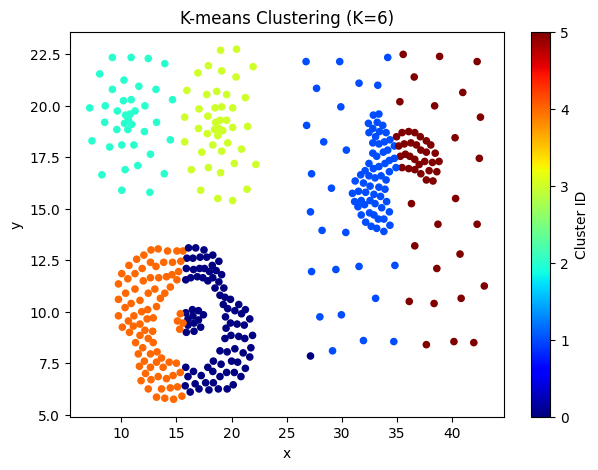

In [136]:
SSE = []

k_means1 = cluster.KMeans(n_clusters=2, random_state=1)
k_means1.fit(data)
labels1 = pd.DataFrame(k_means1.labels_,columns=['Cluster ID'])
result1 = pd.concat((data, labels1), axis=1)
SSE.append(k_means1.inertia_)

k_means2 = cluster.KMeans(n_clusters=3, random_state=1)
k_means2.fit(data)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data, labels2), axis=1)
SSE.append(k_means2.inertia_)

k_means3 = cluster.KMeans(n_clusters=4, random_state=1)
k_means3.fit(data)
labels3 = pd.DataFrame(k_means3.labels_,columns=['Cluster ID'])
result3 = pd.concat((data, labels3), axis=1)
SSE.append(k_means3.inertia_)

k_means4 = cluster.KMeans(n_clusters=5, random_state=1)
k_means4.fit(data)
labels4 = pd.DataFrame(k_means4.labels_,columns=['Cluster ID'])
result4 = pd.concat((data, labels4), axis=1)
SSE.append(k_means4.inertia_)

k_means5 = cluster.KMeans(n_clusters=6, random_state=1)
k_means5.fit(data)
labels5 = pd.DataFrame(k_means5.labels_,columns=['Cluster ID'])
result5 = pd.concat((data, labels5), axis=1)
SSE.append(k_means5.inertia_)


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering (K=2)')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering (K=3)')

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
result3.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering (K=4)')
result4.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering (K=5)')

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
result5.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering (K=6)')

Text(0, 0.5, 'SSE')

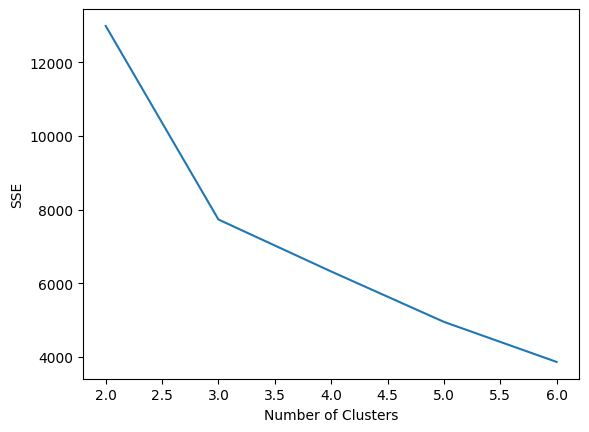

In [137]:
plt.plot([2, 3, 4, 5, 6], SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [138]:
## Discussion:
# From (2) we can see that k=3 gave the correct clustering match with the distribution of the data points.
# From (3) we can clarify the result we got from (2) that the best k for this dataset is k=3 based on the elbow approach

In [139]:
# Part II:

Text(0.5, 1.0, 'DBSCAN Clustering (Eps=3.25, MinPt=6)')

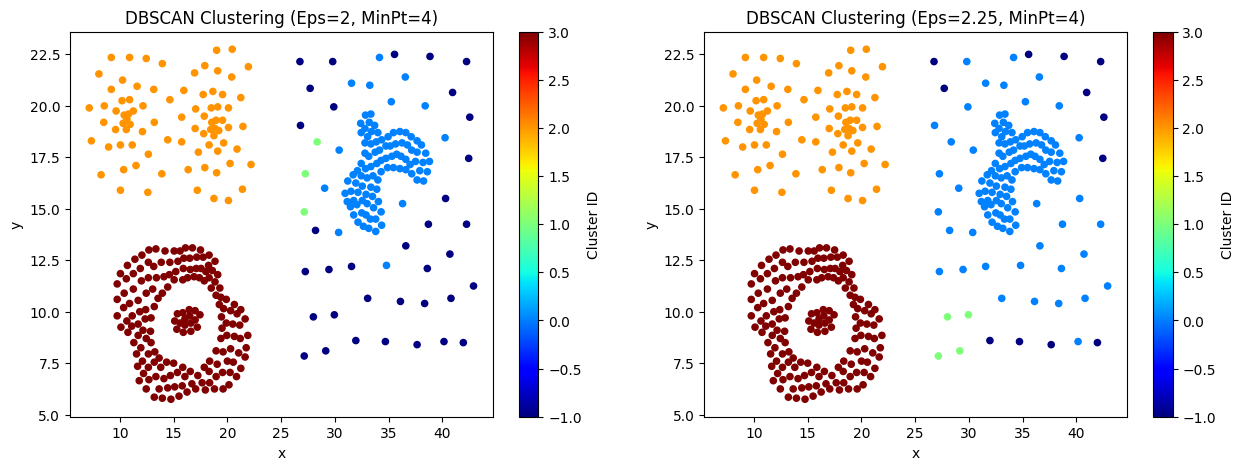

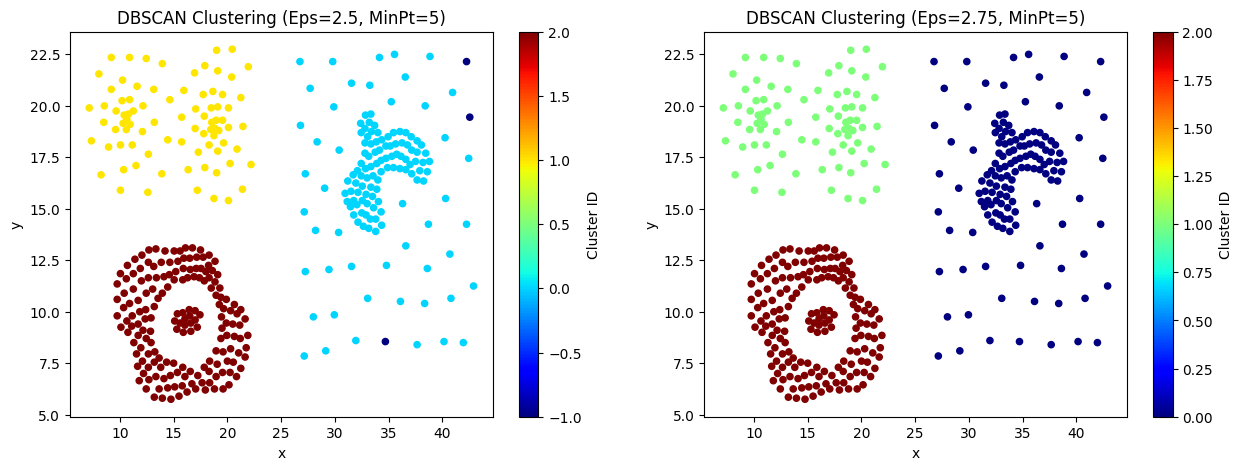

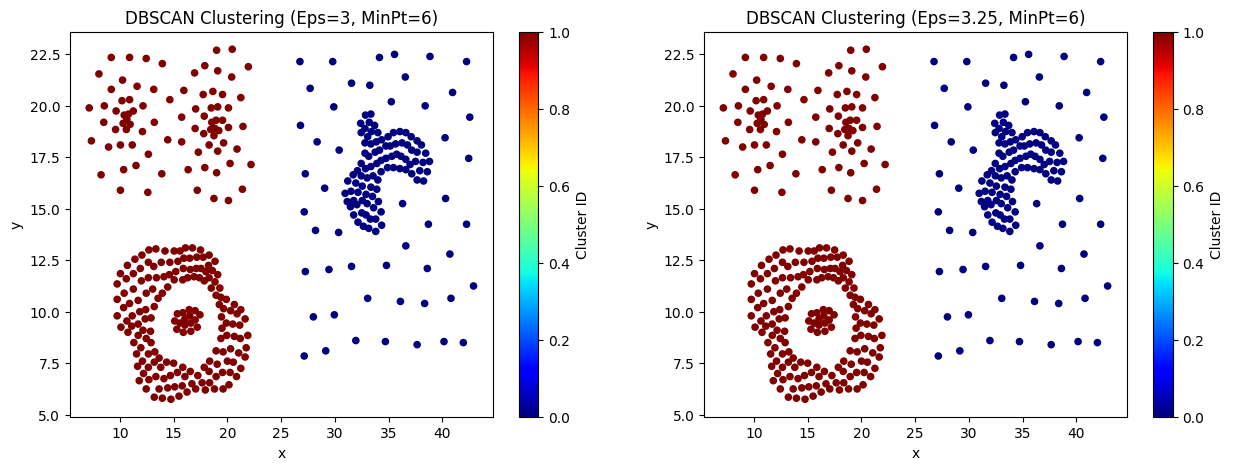

In [140]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

db = DBSCAN(eps=2, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('DBSCAN Clustering (Eps=2, MinPt=4)')

db = DBSCAN(eps=2.25, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('DBSCAN Clustering (Eps=2.25, MinPt=4)')

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

db = DBSCAN(eps=2.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('DBSCAN Clustering (Eps=2.5, MinPt=5)')

db = DBSCAN(eps=2.75, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('DBSCAN Clustering (Eps=2.75, MinPt=5)')

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

db = DBSCAN(eps=3, min_samples=6).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('DBSCAN Clustering (Eps=3, MinPt=6)')

db = DBSCAN(eps=3.25, min_samples=6).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('DBSCAN Clustering (Eps=3.25, MinPt=6)')

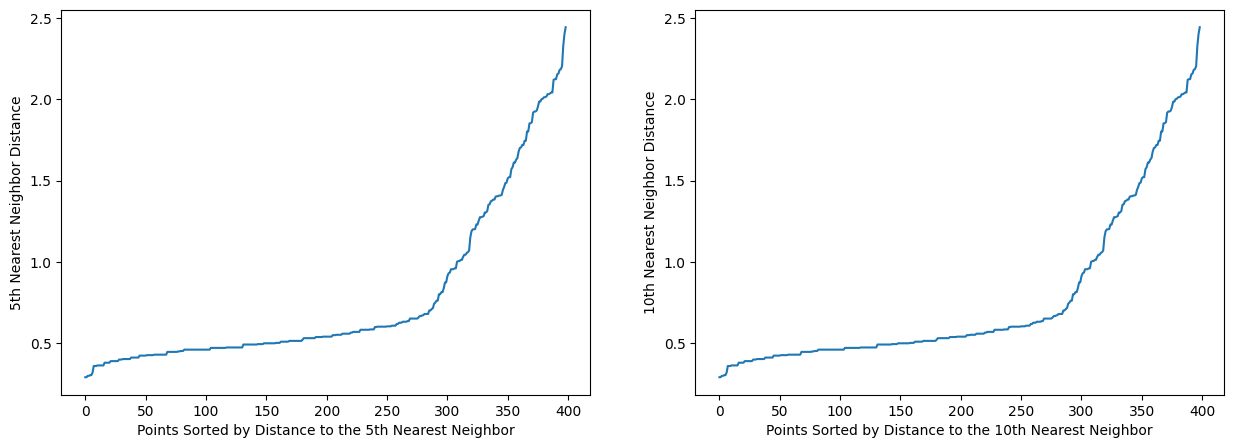

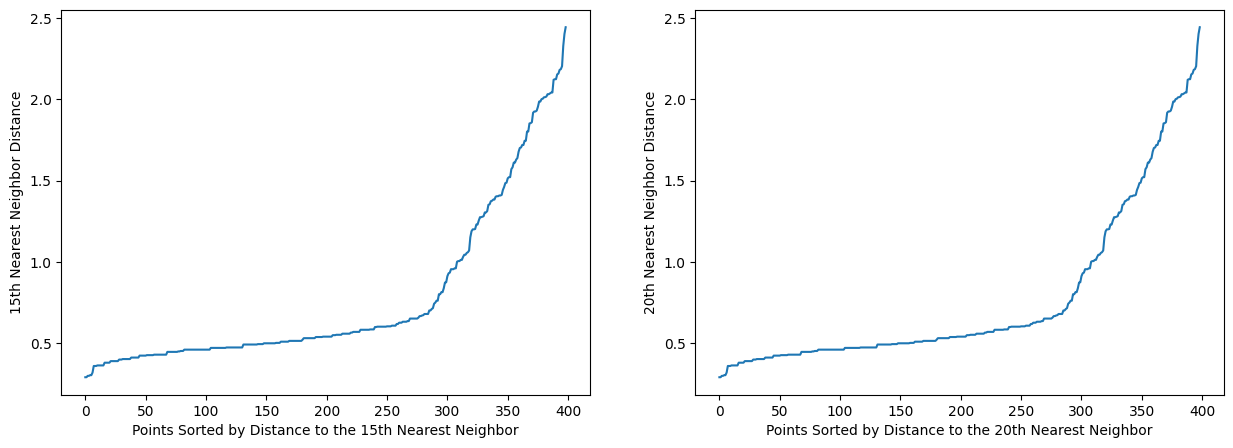

In [141]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax1.set_xlabel('Points Sorted by Distance to the 5th Nearest Neighbor')
ax1.set_ylabel('5th Nearest Neighbor Distance')
ax1.plot(distances)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax2.set_xlabel('Points Sorted by Distance to the 10th Nearest Neighbor')
ax2.set_ylabel('10th Nearest Neighbor Distance')
ax2.plot(distances)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax1.set_xlabel('Points Sorted by Distance to the 15th Nearest Neighbor')
ax1.set_ylabel('15th Nearest Neighbor Distance')
ax1.plot(distances)

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax2.set_xlabel('Points Sorted by Distance to the 20th Nearest Neighbor')
ax2.set_ylabel('20th Nearest Neighbor Distance')
ax2.plot(distances)

In [142]:
## Discussion:
# According to the graphs above, we can see that the optimal Eps would be Eps=1 using the elbow approach
# The optimal MinPts would be MinPts=4 to MinPts=5, since the dataset has 2 dimensions (x and y), therefore MinPts = 2 * dim (according to multiple studies)

Text(0.5, 1.0, 'DBSCAN Clustering (Eps=1, MinPts=5)')

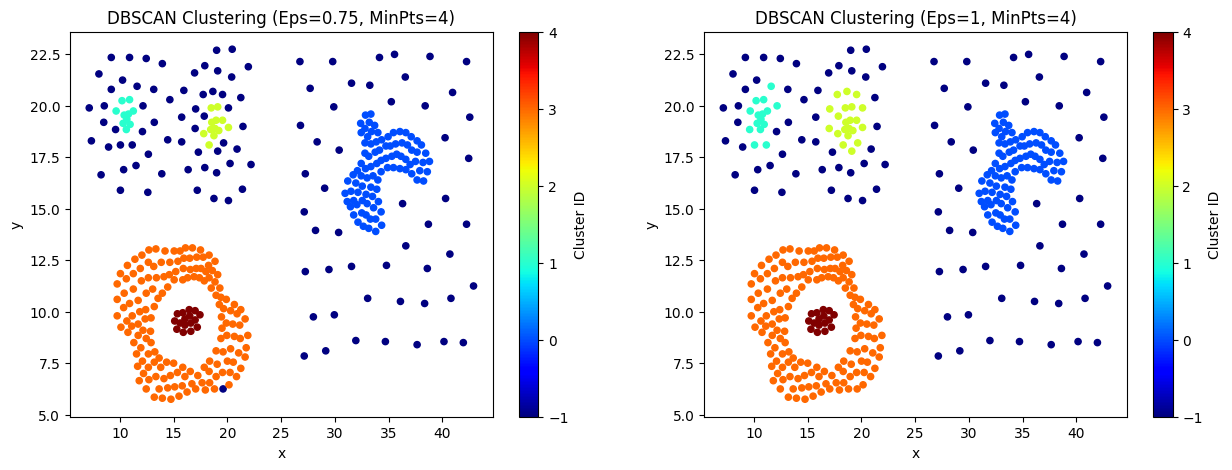

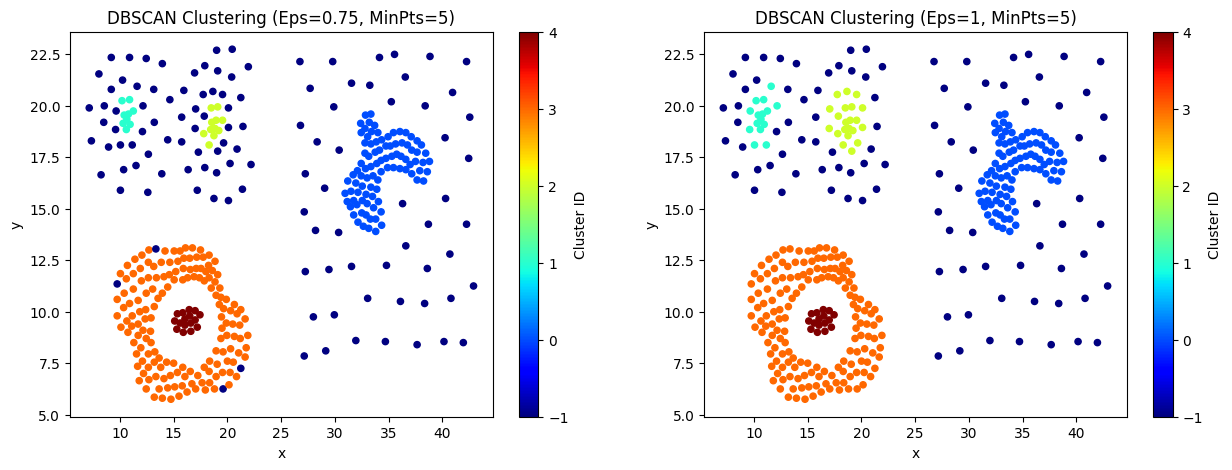

In [143]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

db = DBSCAN(eps=0.75, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('DBSCAN Clustering (Eps=0.75, MinPts=4)')

db = DBSCAN(eps=1, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('DBSCAN Clustering (Eps=1, MinPts=4)')

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

db = DBSCAN(eps=0.75, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('DBSCAN Clustering (Eps=0.75, MinPts=5)')

db = DBSCAN(eps=1, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('DBSCAN Clustering (Eps=1, MinPts=5)')

In [144]:
## Part III:

# K-means clustering:
# - Pros: Work well on large datasets, especially datasets with globular-shaped distribution, considerably fast compared to other methods
# - Cons: Sensitive the initial number of clusters chosen (k), doesn't work well with arbitrary-shaped clusters, or with outliers and noisy datasets

# DBSCAN clustering:
# - Pros: Work well on density-based clustering, efficiently handle outliers, noisy datasets and high dimensional datasets
# - Cons: Slow compared to other methods, doesn't work well with sparse datasets or for data points with varying density, sensitive to Eps and MinPts